# <center> ML Project - Bank Marketing Prediction

## Data Science Problem Statement

** The classification problem goal is to predict if the client will subscribe (yes/no) a term deposit (variable y).


# Lets first understand the dataset

**Data Set Information**

*The data is related to direct marketing campaigns of a Portuguese banking institution. 
*The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be subscribed ('yes') or not ('no') subscribed.


#### Data Source: https://archive.ics.uci.edu/ml/datasets/bank+marketing

**Taget Variable : Response Whuch has binary value--> the client subscribed a term deposit? ('yes','no')|

###  Importing necessary libraries

We will use the popular scikit-learn library to develop our machine learning algorithms.For data visualization, we will use the matplotlib and seaborn library. Below are common classes to load.

In [127]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder,MinMaxScaler,StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier ,GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import roc_auc_score ,mean_squared_error,accuracy_score,classification_report,roc_curve,confusion_matrix
from scipy.stats.mstats import winsorize
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
pd.set_option('display.max_columns',None)

### Load and Prepare dataset

- In this task, we'll load the dataframe in pandas, display the top five rows of the dataset.

In [128]:
path = 'bank-marketing.csv'
dataframe = pd.read_csv(path,delimiter=',')
print('Shape of the data is: ',dataframe.shape)
dataframe.head(5)

Shape of the data is:  (45211, 19)


,age,job,salary,marital,education,targeted,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response
0,58,management,100000,married,tertiary,yes,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,60000,single,secondary,yes,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,120000,married,secondary,yes,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,20000,married,unknown,no,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,0,single,unknown,no,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


### Check Numeric and Categorical Features
* 1. check for the datatypes of all the features.


In [129]:
dataframe.dtypes

age           int64
job          object
salary        int64
marital      object
education    object
targeted     object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
response     object
dtype: object

In [130]:
# Function to identify numeric features
def numeric_features(dataset):
    numeric_col = dataset.select_dtypes(include=np.number).columns.tolist()
    return dataset[numeric_col].head()

In [131]:
numeric_columns = numeric_features(dataframe)
print("Numeric Features:")
print(numeric_columns)
print("===="*20)


Numeric Features:
   age  salary  balance  day  duration  campaign  pdays  previous
0   58  100000     2143    5       261         1     -1         0
1   44   60000       29    5       151         1     -1         0
2   33  120000        2    5        76         1     -1         0
3   47   20000     1506    5        92         1     -1         0
4   33       0        1    5       198         1     -1         0


In [132]:
# Function to identify categorical features
def categorical_features(dataset):
    categorical_col = dataset.select_dtypes(exclude=np.number).columns.tolist()
    return dataset[categorical_col].head()


In [133]:
categorical_columns = categorical_features(dataframe)
print("Categorical Features:")
print(categorical_columns)

Categorical Features:
            job  marital  education targeted default housing loan  contact  \
0    management  married   tertiary      yes      no     yes   no  unknown   
1    technician   single  secondary      yes      no     yes   no  unknown   
2  entrepreneur  married  secondary      yes      no     yes  yes  unknown   
3   blue-collar  married    unknown       no      no     yes   no  unknown   
4       unknown   single    unknown       no      no      no   no  unknown   

  month poutcome response  
0   may  unknown       no  
1   may  unknown       no  
2   may  unknown       no  
3   may  unknown       no  
4   may  unknown       no  


### Check Missing Data 

One of the main steps in data preprocessing is handling missing data. 
Missing data means absence of observations in columns that can be caused while procuring the data, lack of information, incomplete results etc. 

Feeding missing data to your machine learning model could lead to wrong prediction or classification. Hence it is necessary to identify missing values and treat them.



- In the function below, we calculate the total missing values and the percentage of missing values in every feature of the dataset.
- The function ideally returns a dataframe consisting of the feature names as index and two columns having the count and percentage of missing values in that feature.

In [134]:
# Function to identify the number of missing values in every feature
dataframe.isnull().sum().sort_values(ascending=False)



age          0
contact      0
poutcome     0
previous     0
pdays        0
campaign     0
duration     0
month        0
day          0
loan         0
job          0
housing      0
balance      0
default      0
targeted     0
education    0
marital      0
salary       0
response     0
dtype: int64

### Check for Class Imbalance

Class imbalance occurs when the observations belonging to one class in the target are significantly higher than the other class or classes. A class distribution of **80:20 or greater** is typically considered as an imbalance for a binary classification. 

Since most machine learning algorithms assume that data is equally distributed, applying them on imbalanced data often results in bias towards majority classes and poor classification of minority classes. Hence we need to identify & deal with class imbalance. 

Let's write a function below that takes the target variable and outputs the distribution of classes in the target.

In [135]:
a=dataframe['response'].value_counts()/len(dataframe['response'])*100
a

no     88.30152
yes    11.69848
Name: response, dtype: float64

### Observations : 
- The class distribution in the response(target variable) is ~88.30. This is a clear indication of imbalance.


# <center> <font color="blue">Task 1 
####    Describe the pdays column, make note of the mean, median and minimum values. Anything fishy in the values?

 Exploring PDays

 About pdays column: It is number of days that passed by after the client was last contacted from a previous campaign numeric; 999 means client was not previously contacted)


In [136]:
dataframe['pdays'].mean()


40.19782796222158

In [137]:
dataframe['pdays'].median()

-1.0

In [138]:
print("Minimum value in pdays ",dataframe['pdays'].min())

Minimum value in pdays  -1


In [139]:
dataframe[dataframe['pdays']==-1]


,age,job,salary,marital,education,targeted,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response
0,58,management,100000,married,tertiary,yes,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,60000,single,secondary,yes,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,120000,married,secondary,yes,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,20000,married,unknown,no,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,0,single,unknown,no,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45203,23,student,4000,single,tertiary,no,no,113,no,no,cellular,17,nov,266,1,-1,0,unknown,yes
45205,25,technician,60000,single,secondary,yes,no,505,no,yes,cellular,17,nov,386,2,-1,0,unknown,yes
45206,51,technician,60000,married,tertiary,yes,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,55000,divorced,primary,yes,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes


Finding : total "36954" has value -1 in pdays

Finding : Number of days can't be negative ,it has maximum value as -1 is abnormal ,Before training it should be removed 


# <center><font color="blue"> Task 2 
### Describe the pdays column again, this time limiting yourself to the relevant values of pdays. How different are the mean and the median values?



In [140]:
df=dataframe.copy()
df['pdays'].describe()

p_mean=df['pdays'].mean()
print("Mean with outlier -1 in data set column pdays",p_mean)

p_median=df['pdays'].median()
print("Median with outlier -1 in data set column pdays",p_median)

Mean with outlier -1 in data set column pdays 40.19782796222158
Median with outlier -1 in data set column pdays -1.0


In [141]:
# After Treatment result

new=df[df['pdays']==-1]

In [142]:
print(f"New mean excluding -1 in pdays:{new['pdays'].mean()} \nBefore that mean :{p_mean}")

New mean excluding -1 in pdays:-1.0 
Before that mean :40.19782796222158


In [143]:
print(f"New Median after excluding -1 in pdays : {new['pdays'].median()} \nBefore that median : {p_median}")

New Median after excluding -1 in pdays : -1.0 
Before that median : -1.0


In [144]:
new.shape

(36954, 19)

 From above if we droping -1 value we may lost valueable information
 we can clearly see the diffrence between before and after mean



### <font color="Blue"> Task 3 :Make a box plot for pdays. Do you see any outliers?

In [145]:
import seaborn as sns
import matplotlib.pyplot as plt

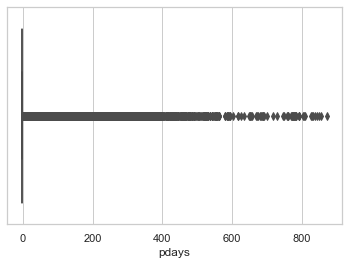

In [146]:
sns.set_theme(style="whitegrid")

ax = sns.boxplot(x=df["pdays"])



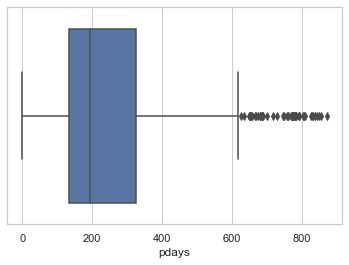

In [147]:
#plot after removing -1 value in dataet column pdays
a=df[df['pdays']!=-1]

sns.set_theme(style="whitegrid")

ax = sns.boxplot(x=a["pdays"])

## There is a lot of outlier in data pdays

Yes,I can see outlier in data after 650

In [148]:
# Lets confirm Outlier
per25=a["pdays"].quantile(q=.25)
per75=a["pdays"].quantile(q=.75)

In [149]:
IQR=per75-per25

In [150]:
upeer_limit=per75+1.5*IQR
upeer_limit

618.0

In [151]:
lower_limit=per25-1.5*per25
lower_limit

-66.5

Values in pdays shoulbe be between -66.5 to 618 rest are outliers

### <font color="blue">Task 3 : Plot a horizontal bar graph with the median values of balance for each education level value?
 Which group has the highest median?

Text(0.5, 1.0, 'Median value of balance for each education level')

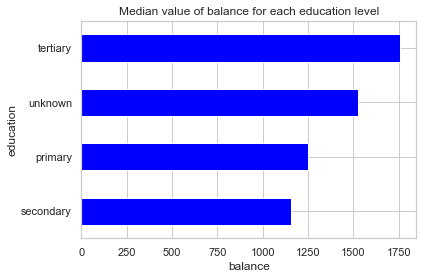

In [152]:
df.groupby('education')['balance'].mean().sort_values().plot.barh(color="blue")
plt.xlabel('balance')
plt.title("Median value of balance for each education level")

### we can see group " Tertiary " has maximum balance



## EDA & Data Visualizations

Exploratory data analysis is an approach to analyzing data sets by summarizing their main characteristics with visualizations.  

###  Univariate analysis of Categorical columns

Univariate analysis means analysis of a single variable. It’s mainly describes the characteristics of the variable.

If the variable is categorical we can use either a bar chart or a pie chart to find the distribution of the classes in the variable.


In [153]:
# Function to perform univariate analysis of categorical columns
def plot_categorical_columns(dataframe):
    categorical_columns = dataframe.select_dtypes(include=['object']).columns
    
    for i in range(0,len(categorical_columns)):
                           
                plt.figure(figsize=(10,4))
                dataframe[categorical_columns[i]].value_counts().plot(kind='bar')
                plt.title(categorical_columns[i])
                plt.show()

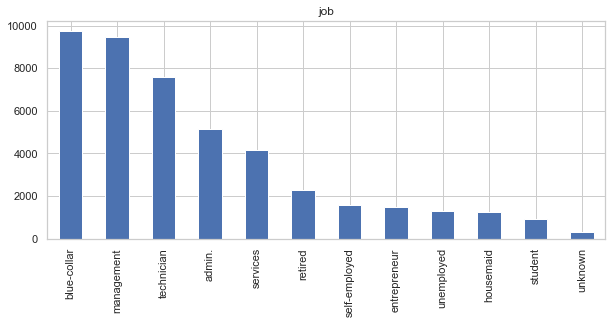

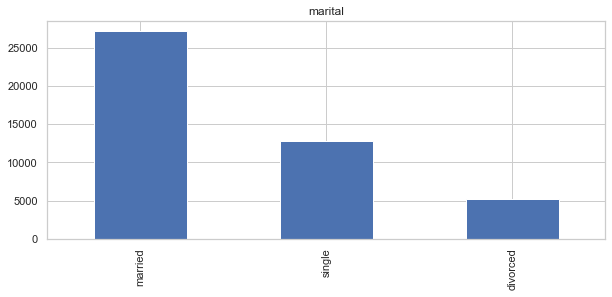

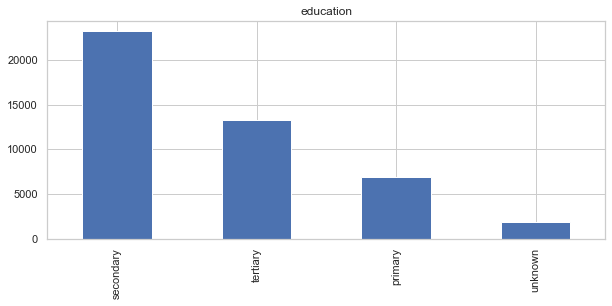

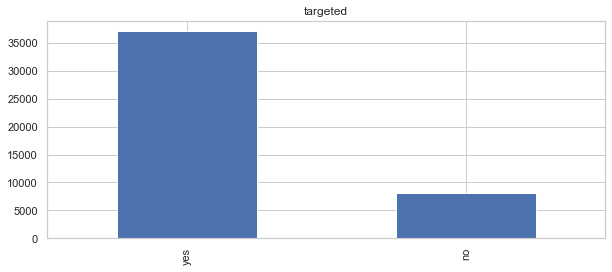

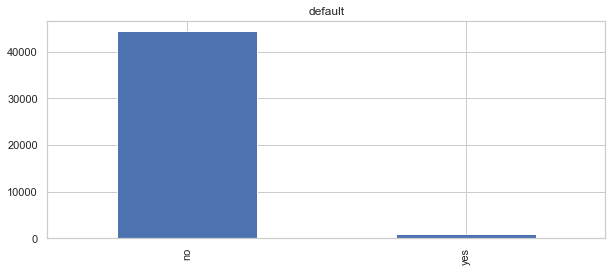

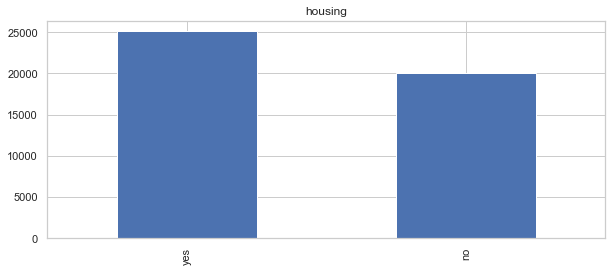

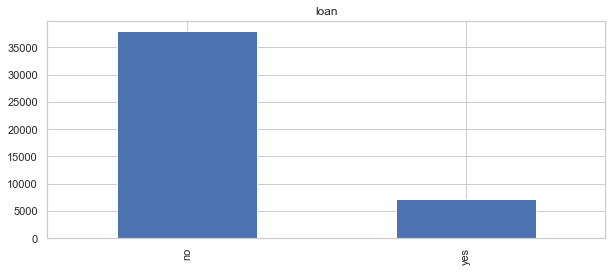

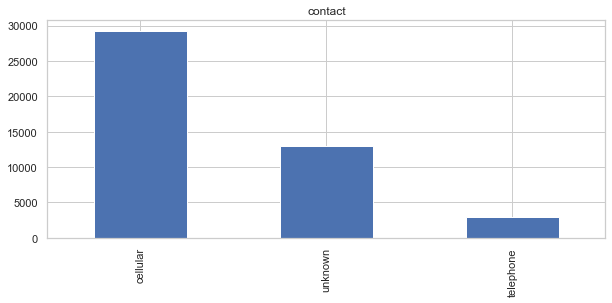

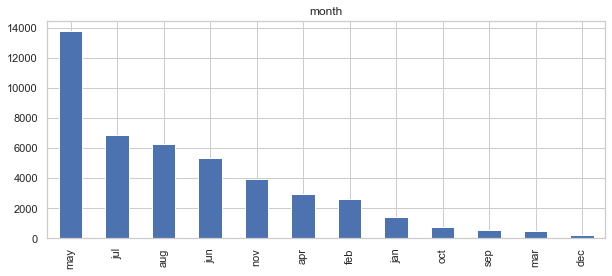

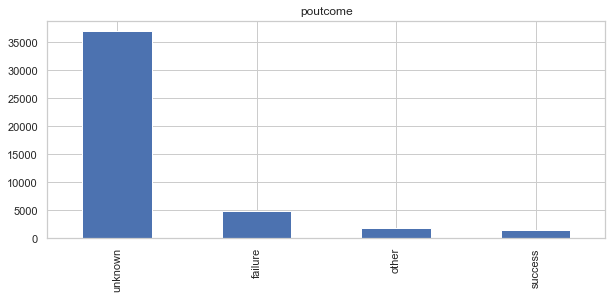

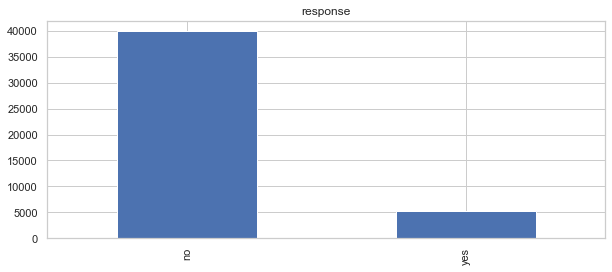

In [154]:
plot = plot_categorical_columns(dataframe)

### Observations :

From the above visualizations, we can make the following observations: 
- Job: The top three professions that our customers belong to are - blue-collar jobs ,managements and technicians.
- Martial Status : A huge number of the customers are married.
- Education : Mostly people have education level secondary.
- Majority of the customers have house and No loan records.
- Cell-phones seem to be the most favoured method of reaching out to customers.
- Many customers have been contacted in the month of **May** follow by july and then aug.
- Poutcome : Mostly values are unknown -->Might be they are calling first time(New Customer)
- Response : Response has inbalance response --Mostly no(we will this later)
- The missing values in some columns have been represented as `unknown`. `unknown` represents missing data. In the next task, we will treat these values.  

### Univariate analysis of Continuous columns
Just like for categorical columns, by performing a univariate analysis on the continuous columns, we can get a sense of the distrbution of values in every column and of the outliers in the data. 

Histograms are great for plotting the distribution of the data and boxplots are the best choice for visualizing outliers. 



In [155]:
# Function to plot histograms
def plot_continuous_columns(dataframe):
    numeric_columns = dataframe.select_dtypes(include=['number']).columns.tolist()
    dataframe = dataframe[numeric_columns]
    
    for i in range(0,len(numeric_columns)):
    
            plt.figure(figsize=(10,4))
            plt.subplot(121)
            sns.distplot(dataframe[numeric_columns[i]], kde=False)
            plt.subplot(122)
            sns.boxplot(dataframe[numeric_columns[i]])
            plt.show()

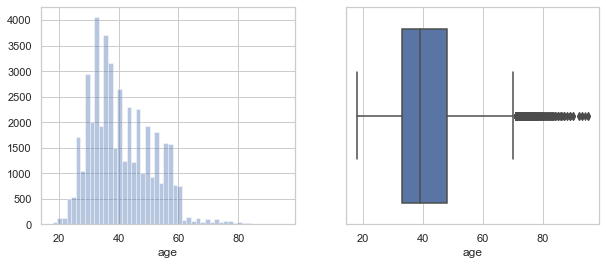

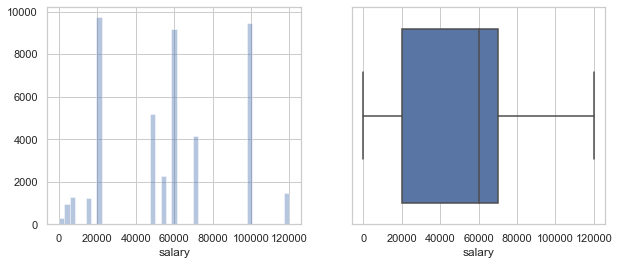

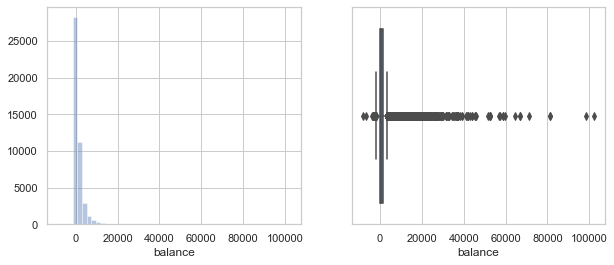

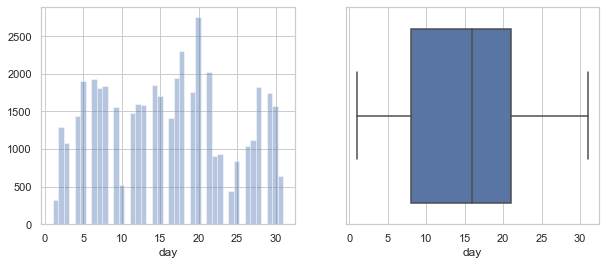

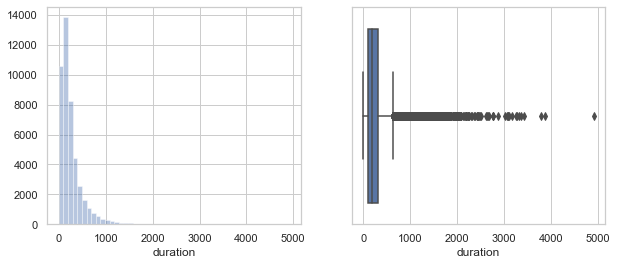

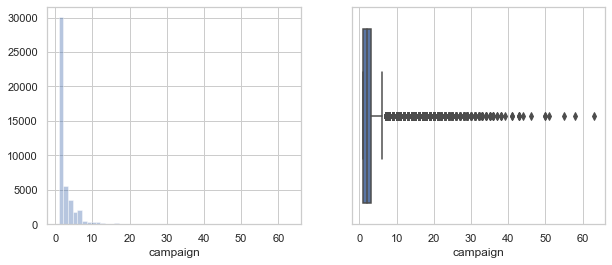

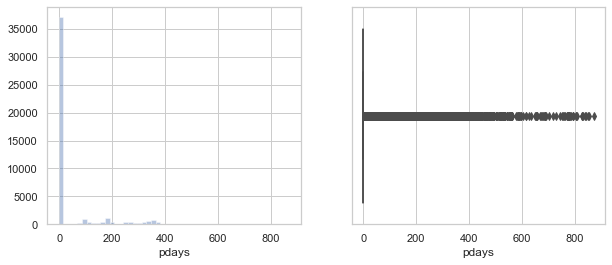

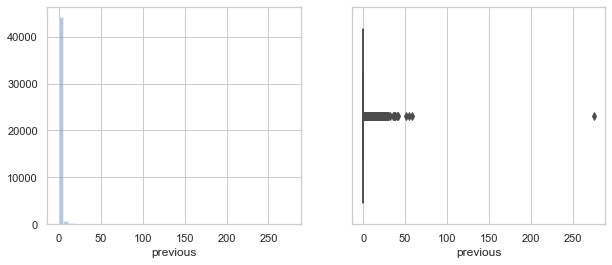

In [156]:
plot_continuous_columns(dataframe)           


### Observation :

- As we can see from the histogram, the features `age`, `duration` and `campaign` are heavily skewed and this is due to the presence of outliers as seen in the boxplot for these features. We will deal with these outliers in the steps below.
- Looking at the plot for `pdays`, we can infer that majority of the customers were being contacted for the first time. 
- Since the features `pdays` and `previous` consist majorly only of a single value, their variance is quite less and hence we can drop them since technically will be of no help in prediction.

### <font color="blue">Task : - Convert the response variable to a convenient form
    
    The final goal is to make a predictive model to predict if the customer will respond positively to the campaign or not. The target variable is “response”.

In [157]:
df.response.replace({'yes':1,"no":0}, inplace=True)

df['response'].tail(10)

45201    1
45202    1
45203    1
45204    1
45205    1
45206    1
45207    1
45208    1
45209    0
45210    0
Name: response, dtype: int64

### <font color ="blue"> Task :First, perform bi-variate analysis to identify the features that are directly associated with the target.

Bivariate analysis involves checking the relationship between two variables simultaneously.
    
In the function below, we plot every categorical feature against the target by plotting a barchart. 

In [158]:
def bivariate_analysis_categorical(dataframe,target):
    
    categorical_columns = dataframe.select_dtypes(exclude=np.number).columns
    for i in range(0,len(categorical_columns)):
            plt.figure(figsize=(15,5))
            sns.countplot(x=dataframe[categorical_columns[i]],hue=target,data=dataframe)
            plt.xticks()
            plt.show()


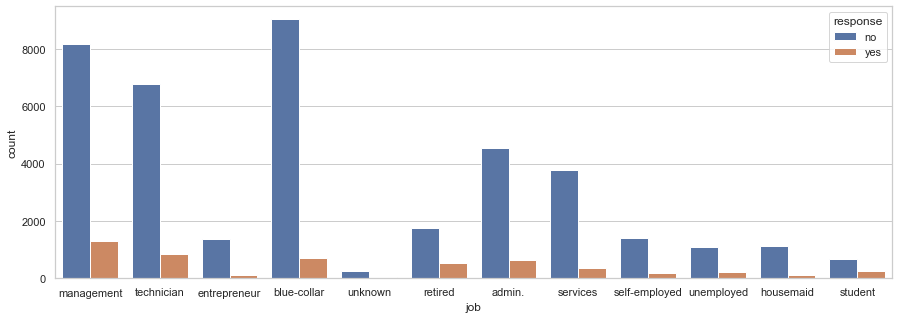

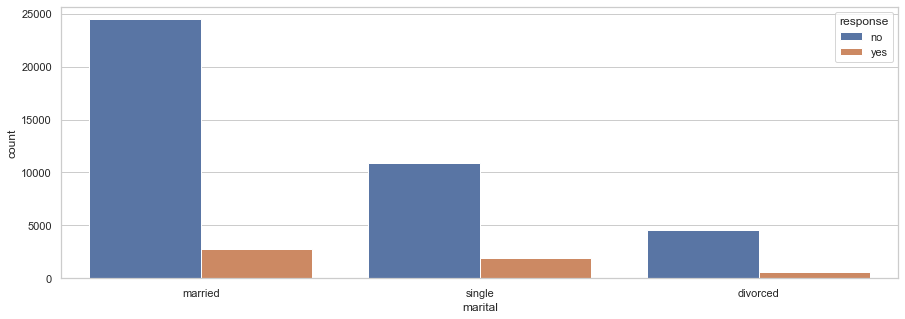

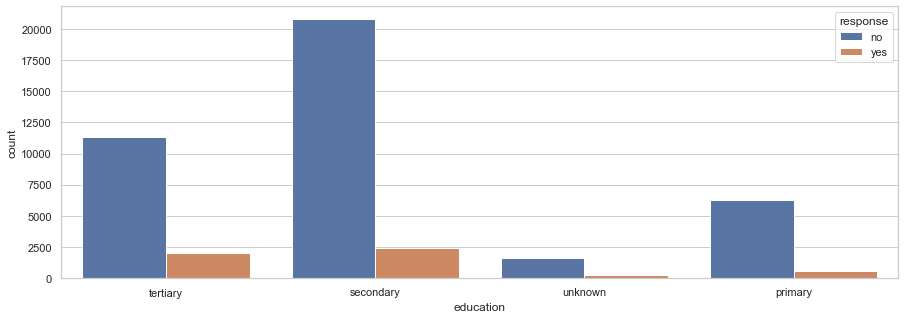

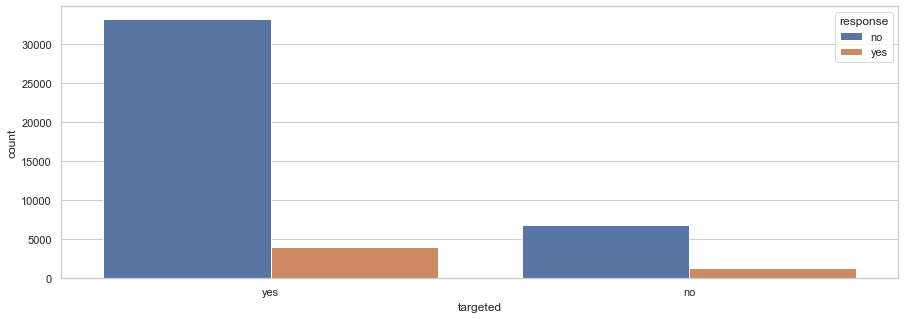

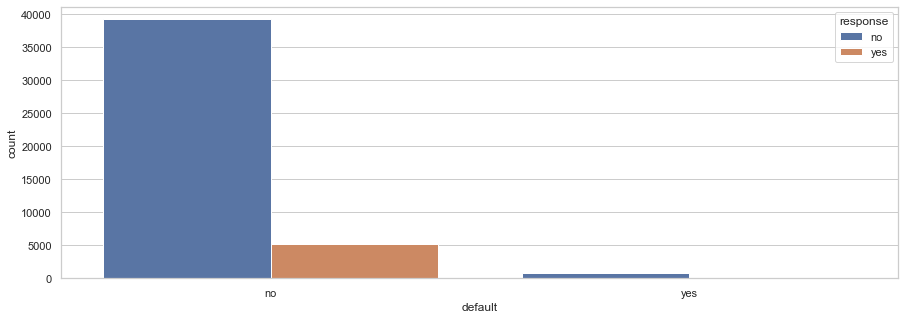

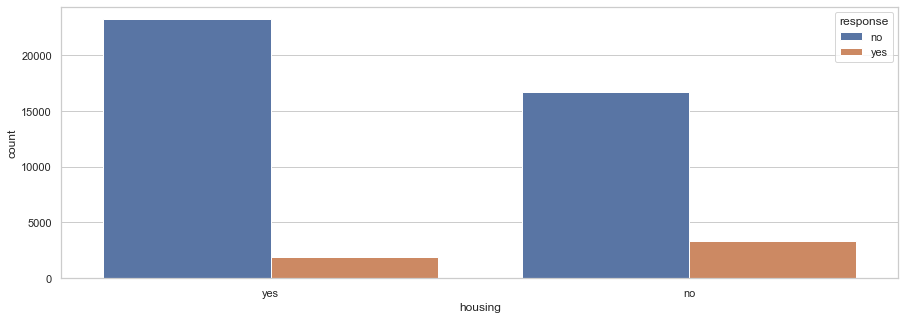

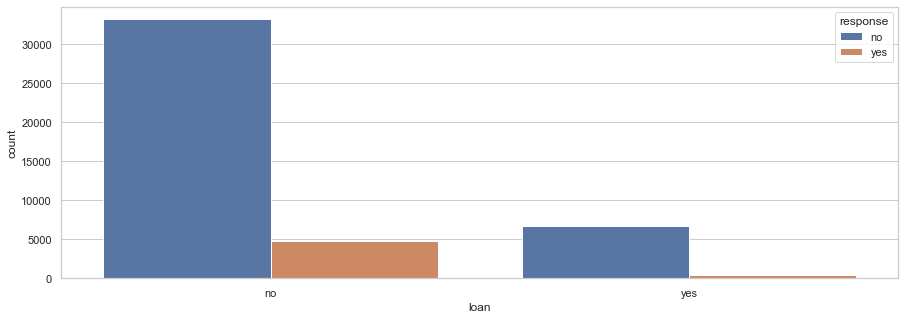

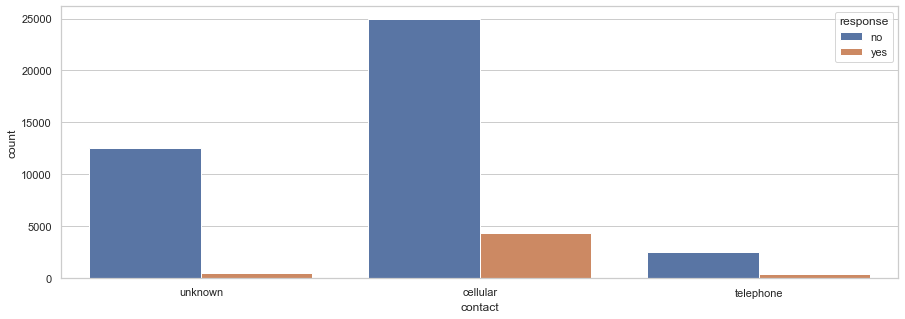

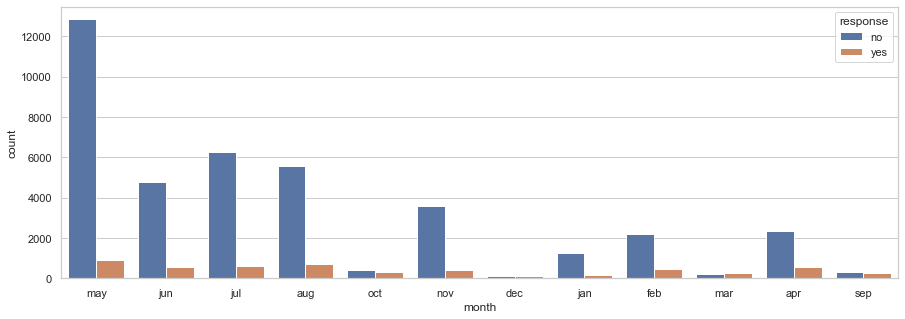

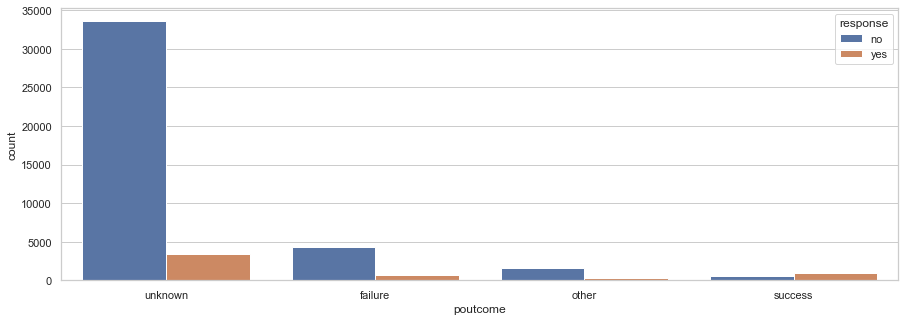

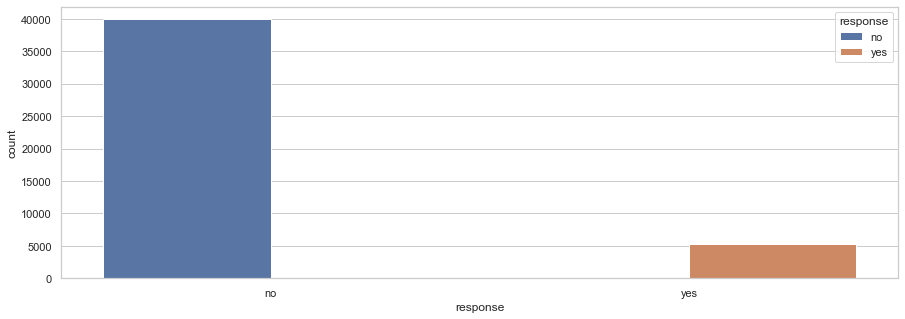

In [159]:
bivariate_analysis_categorical(dataframe,dataframe['response'])

### Observations:

- The common traits seen for customers who have subscribed for the term deposit are :
    - Customers having management,technician,blue collar jobs form the majority amongst those who have subscirbed to the term deposit with technicians being the second majority.
    - They are married 
    - They hold a tertiary and secondary degree(Means education level is high).
    - Compare with people having house ,who dont have house are subscribed to term deposit.
    - There is sesional trend in data-Aug and may above more yes
    - Cell-phones should be the preferred mode of contact for contacting customers.

### <font color ="blue"> Task : Are the features about the previous campaign data useful?

In [160]:
df[['previous','response']].groupby("response").mean()

,previous
response,
0,0.502154
1,1.170354


<AxesSubplot:title={'center':'previous'}, xlabel='[response]'>

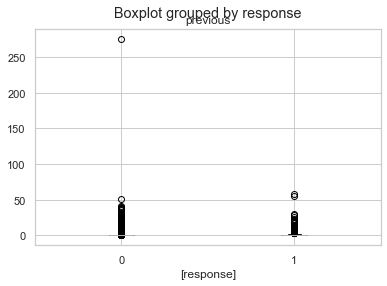

In [161]:
df.boxplot(['previous'],['response'])

In [162]:
categorical_cols = ['job','marital','education','default','housing','loan','contact','month','poutcome']

numerical_cols = [x for x in df.columns.to_list() if x not in categorical_cols]


In [163]:
numerical_cols.remove('response')

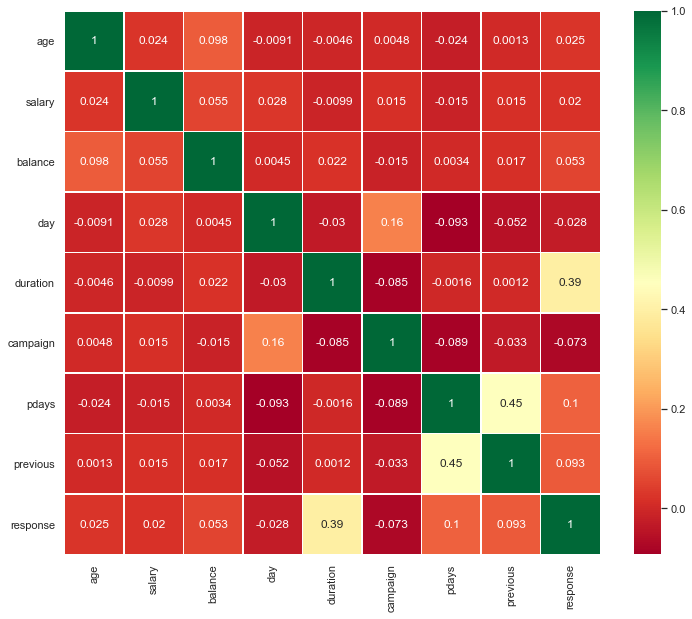

In [164]:
corr_data = df[numerical_cols+['response']]
corr = corr_data.corr()
plt.close()
sns.heatmap(corr,annot=True,cmap='RdYlGn',linewidths=0.5)
fig=plt.gcf()
fig.set_size_inches(12,10)
plt.show()

#### As we can observe in above correlation matrix, previous campaign data is not much correlated. and have only 0.0093 almost close to 0. so previous data cannot be used to predict.

In [165]:
# Answer : No data features about the previous campaign data is not usefull


# <font color="blue"> Task : Are pdays and poutcome associated with the target?

In [166]:
pd.crosstab(df['pdays'],df['previous'],values=df['response'],aggfunc='count',margins=True,normalize=True)

previous,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,32,35,37,38,40,41,51,55,58,275,All
pdays,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
-1,0.817367,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.817367
1,0.000000,0.000111,0.000022,0.000044,0.000000,0.000022,0.000044,0.000066,0.000022,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000332
2,0.000000,0.000310,0.000177,0.000155,0.000022,0.000088,0.000022,0.000022,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000022,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000818
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000022,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000022
4,0.000000,0.000044,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000044
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
842,0.000000,0.000022,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000022
850,0.000000,0.000000,0.000022,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000022
854,0.000000,0.000000,0.000022,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000022


<AxesSubplot:xlabel='poutcome', ylabel='pdays'>

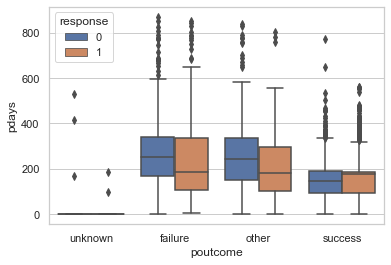

In [167]:
sns.boxplot(x=df['poutcome'],y=df['pdays'],hue=df['response'])

In [168]:
pd.crosstab(df['pdays'],df['poutcome'],values=df['response'],aggfunc='count',margins=True,normalize=True)

poutcome,failure,other,success,unknown,All
pdays,,,,,
-1,0.000000,0.000000,0.000000,0.817367,0.817367
1,0.000066,0.000066,0.000199,0.000000,0.000332
2,0.000022,0.000774,0.000022,0.000000,0.000818
3,0.000000,0.000022,0.000000,0.000000,0.000022
4,0.000022,0.000000,0.000022,0.000000,0.000044
...,...,...,...,...,...
842,0.000022,0.000000,0.000000,0.000000,0.000022
850,0.000022,0.000000,0.000000,0.000000,0.000022
854,0.000022,0.000000,0.000000,0.000000,0.000022


In [169]:
# Finding--> From above we can say pdays and poutcome are assoicated with each other.

### <font color="blue"> Task : If yes, and if you plan to use them – how do you handle the pdays column with a value of -1 where the previous campaign data is missing? Explain your approach and your decision.


In [170]:
b=df[df['pdays']==-1 ] 
b

,age,job,salary,marital,education,targeted,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response
0,58,management,100000,married,tertiary,yes,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,0
1,44,technician,60000,single,secondary,yes,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,0
2,33,entrepreneur,120000,married,secondary,yes,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,0
3,47,blue-collar,20000,married,unknown,no,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,0
4,33,unknown,0,single,unknown,no,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45203,23,student,4000,single,tertiary,no,no,113,no,no,cellular,17,nov,266,1,-1,0,unknown,1
45205,25,technician,60000,single,secondary,yes,no,505,no,yes,cellular,17,nov,386,2,-1,0,unknown,1
45206,51,technician,60000,married,tertiary,yes,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,1
45207,71,retired,55000,divorced,primary,yes,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,1


# Finding -
From above pdays = -1 has overall count of 36954 same as previous =0 ,which implies 
that many of people were not contacted.

In [171]:

# Function to detect outliers in every feature

In [172]:
def detect_outliers(dataframe):
    cols = list(dataframe)
    outliers = pd.DataFrame(columns=['Feature','Number of Outliers'])
    
    for column in cols:
        if column in dataframe.select_dtypes(include=np.number).columns:
            # first quartile (Q1)
            q1 = dataframe[column].quantile(0.25) 
            
            # third quartile (Q3)
            q3 = dataframe[column].quantile(0.75)
            
            # IQR
            iqr = q3 - q1
            
            fence_low = q1 - (1.5*iqr)
            fence_high = q3 + (1.5*iqr)
            outliers = outliers.append({'Feature':column,'Number of Outliers':dataframe.loc[(dataframe[column] < fence_low) | (dataframe[column] > fence_high)].shape[0]},ignore_index=True)
    return outliers


In [173]:
detect_outliers(dataframe)

,Feature,Number of Outliers
0,age,487
1,salary,0
2,balance,4729
3,day,0
4,duration,3235
5,campaign,3064
6,pdays,8257
7,previous,8257


In [174]:
# Function to treat outliers 
def treat_outliers(dataframe):
    cols = list(dataframe)
    for col in cols:
        if col in dataframe.select_dtypes(include=np.number).columns:
            dataframe[col] = winsorize(dataframe[col], limits=[0.05, 0.1],inclusive=(True, True))
        return dataframe   

In [175]:
dataframe = treat_outliers(dataframe)

# Checking for outliers after applying winsorization
detect_outliers(dataframe)

,Feature,Number of Outliers
0,age,0
1,salary,0
2,balance,4729
3,day,0
4,duration,3235
5,campaign,3064
6,pdays,8257
7,previous,8257


In [176]:
dataframe = treat_outliers(dataframe)
dataframe 

,age,job,salary,marital,education,targeted,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response
0,56,management,100000,married,tertiary,yes,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,60000,single,secondary,yes,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,120000,married,secondary,yes,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,20000,married,unknown,no,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,0,single,unknown,no,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,60000,married,tertiary,yes,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,56,retired,55000,divorced,primary,yes,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,56,retired,55000,married,secondary,yes,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,56,blue-collar,20000,married,secondary,yes,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


### Observation :

Using winsorization has resulted in removal of all the outliers from the numerical columns. 

### Function to Label Encode Categorical variables

Before applying our machine learning algorithm, we need to recollect that any algorithm can only read numerical values. It is therefore essential to encode categorical features into numerical values. Encoding of categorical variables can be performed in two ways:
- Label Encoding
- One-Hot Encoding.

For the given dataset, we are going to label encode the categorical columns. 



In [178]:
from sklearn.preprocessing import LabelEncoder


enc=LabelEncoder()
cate_g = dataframe.select_dtypes(include=[object]).reset_index().drop('index',1)
numeric = dataframe.select_dtypes(include=['int64','float64']).reset_index().drop('index',1)
onehotlabels = cate_g.apply(enc.fit_transform)
x_data = pd.concat([onehotlabels, numeric],1)


In [229]:
x_data

,job,marital,education,targeted,default,housing,loan,contact,month,poutcome,response,age,salary,balance,day,duration,campaign,pdays,previous
0,4,1,2,1,0,1,0,2,8,3,0,56,100000,2143,5,261,1,-1,0
1,9,2,1,1,0,1,0,2,8,3,0,44,60000,29,5,151,1,-1,0
2,2,1,1,1,0,1,1,2,8,3,0,33,120000,2,5,76,1,-1,0
3,1,1,3,0,0,1,0,2,8,3,0,47,20000,1506,5,92,1,-1,0
4,11,2,3,0,0,0,0,2,8,3,0,33,0,1,5,198,1,-1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,9,1,2,1,0,0,0,0,9,3,1,51,60000,825,17,977,3,-1,0
45207,5,0,0,1,0,0,0,0,9,3,1,56,55000,1729,17,456,2,-1,0
45208,5,1,1,1,0,0,0,0,9,2,1,56,55000,5715,17,1127,5,184,3
45209,1,1,1,1,0,0,0,1,9,3,0,56,20000,668,17,508,4,-1,0


In [230]:
# Class Balancing

In [231]:
from imblearn.combine import SMOTEENN
sm=SMOTEENN()

In [232]:
x_data['response'].value_counts()

0    39922
1     5289
Name: response, dtype: int64

In [233]:
X=x_data.drop(['response'],axis=1)
X

,job,marital,education,targeted,default,housing,loan,contact,month,poutcome,age,salary,balance,day,duration,campaign,pdays,previous
0,4,1,2,1,0,1,0,2,8,3,56,100000,2143,5,261,1,-1,0
1,9,2,1,1,0,1,0,2,8,3,44,60000,29,5,151,1,-1,0
2,2,1,1,1,0,1,1,2,8,3,33,120000,2,5,76,1,-1,0
3,1,1,3,0,0,1,0,2,8,3,47,20000,1506,5,92,1,-1,0
4,11,2,3,0,0,0,0,2,8,3,33,0,1,5,198,1,-1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,9,1,2,1,0,0,0,0,9,3,51,60000,825,17,977,3,-1,0
45207,5,0,0,1,0,0,0,0,9,3,56,55000,1729,17,456,2,-1,0
45208,5,1,1,1,0,0,0,0,9,2,56,55000,5715,17,1127,5,184,3
45209,1,1,1,1,0,0,0,1,9,3,56,20000,668,17,508,4,-1,0


In [234]:
y=x_data['response']

In [235]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.3,random_state=0)

### Since the target is imbalanced, we apply Synthetic Minority Oversampling (SMOTE) for undersampling and oversampling the majority and minority classes in the target respectively. 

In [236]:
X_resmaple,y_resample=sm.fit_resample(X,y)

In [237]:
X_train1,X_test1,y_train1,y_test1=train_test_split(X_resmaple,y_resample,test_size=.3,random_state=0)

In [238]:
#Standardization
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train1=sc.fit_transform(X_train1)
X_test1=sc.transform(X_test1)

In [239]:
X_train1

32771    1
44648    1
46336    1
34798    1
10711    0
        ..
45891    1
52416    1
42613    1
43567    1
2732     0
Name: response, Length: 42296, dtype: int32

### Classification models

Since we have label encoded our categorical variables, our data is now ready for applying machine learning algorithms. 

There are many Classification algorithms are present in machine learning, we are using -
- Logistic Regression
- RandomForest Classfier

In [240]:
### Predictive model 1: Logistic regression

In [241]:
lr=LogisticRegression()
model=lr.fit(X_train1,y_train1)

In [242]:
y_pred=lr.predict(X_test1)

In [243]:
df3=pd.DataFrame({'Actual':y_test1,"Predicted":y_pred})

In [244]:
df3

,Actual,Predicted
54895,1,1
2074,0,0
58972,1,1
30893,1,0
34550,1,1
...,...,...
22946,0,0
45414,1,1
6067,0,0
58248,1,1


In [245]:
model.score(X_test1,y_test1)

0.9119042365401588

In [246]:
print(classification_report(y_test1, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.90      0.90      8247
           1       0.92      0.92      0.92      9881

    accuracy                           0.91     18128
   macro avg       0.91      0.91      0.91     18128
weighted avg       0.91      0.91      0.91     18128



## Feature Selection 



###  Using RFE for feature selection
In this task let's use Recursive Feature Elimination for selecting the best features. RFE is a wrapper method that uses the model to identify the best features. 

- The function  `feature selection` takes four parameters `predictors`, `target`, `model` and the `number_of_features`. The parameter `number_of_features` is used for explicitly stating the number of features you want to specify inside the RFE object. For the below task, we have inputted 8 feature. You can change this value and input the number of features you want to retain for your model


In [247]:
from sklearn.model_selection import train_test_split

def run_model(predictors,target, model):
   
    x_train,x_val,y_train,y_val = train_test_split(predictors,target,test_size=0.2,random_state=42)
    model.fit(x_train, y_train)
    y_scores = model.predict(x_val)
    auc = roc_auc_score(y_val, y_scores)
    print('Classification Report:')
    print(classification_report(y_val,y_scores))
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_val, y_scores)
    print('ROC_AUC_SCORE is',roc_auc_score(y_val, y_scores))
     
    plt.plot(false_positive_rate, true_positive_rate)
    plt.xlabel('FPR')
    plt.ylabel('TPR')
    plt.title('ROC curve')
    plt.show()
    return auc


Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.90      0.91      1652
           1       0.92      0.93      0.92      1974

    accuracy                           0.92      3626
   macro avg       0.92      0.92      0.92      3626
weighted avg       0.92      0.92      0.92      3626

ROC_AUC_SCORE is 0.9160634863393609


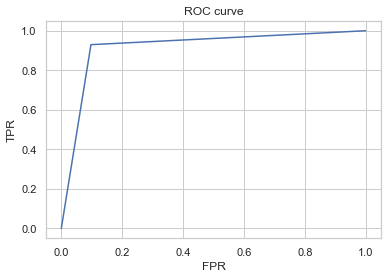

AUC Score = 91.61 %
On Model - 
Logistic Regression
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.94      0.95      1652
           1       0.95      0.97      0.96      1974

    accuracy                           0.96      3626
   macro avg       0.96      0.95      0.95      3626
weighted avg       0.96      0.96      0.96      3626

ROC_AUC_SCORE is 0.9540295021723079


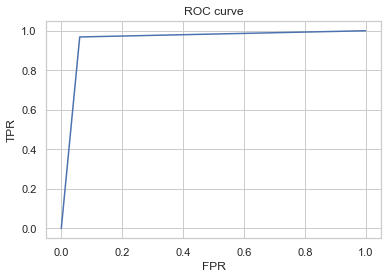

AUC Score = 95.40 %
On Model - 
Random Forest


In [248]:
models = {'Logistic Regression':LogisticRegression,'Random Forest': RandomForestClassifier}

for i in models.items():
    # run model
    model = i[1]()
    auc = run_model(X_test1, y_test1, model) # train and returns AUC test score
    print('AUC Score = %.2f' %(auc*100) +' %\nOn Model - \n'+str(i[0]))
    print('===='*20)

In [249]:
def feature_selection(predictors,target,number_of_features,model):

    models = {'Logistic Regression':LogisticRegression,'Random Forest':RandomForestClassifier}
    models = model()
    rfe = RFE(models,number_of_features)
    rfe = rfe.fit(X_train1,y_train1)
    feature_ranking = pd.Series(rfe.ranking_, index=X.columns)
    #plt.show()
    print('Features  to be selected for {} are:'.format(str(i[0])))
    print(feature_ranking[feature_ranking.values==1].index.tolist())
    print('===='*30)






In [250]:
# Selecting 8 number of features
for i in models.items():
    feature_selection(X_train1,y_train1,8,i[1])
    

Features  to be selected for Logistic Regression are:
['targeted', 'housing', 'loan', 'contact', 'poutcome', 'duration', 'campaign', 'previous']
Features  to be selected for Random Forest are:
['housing', 'contact', 'month', 'poutcome', 'balance', 'day', 'duration', 'pdays']


### Variance Inflation Factor (VIF)

Colinearity is the state where two variables are highly correlated and contain similiar information about the variance within a given dataset. To detect colinearity among variables, simply create a correlation matrix and find variables with large absolute values.

                        V.I.F. = 1 / (1 - R^2). 

The Variance Inflation Factor (VIF) is a measure of colinearity among predictor variables within a multiple regression. It is calculated by taking the the ratio of the variance of all a given model's betas divide by the variane of a single beta if it were fit alone.


In [251]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [252]:
# VIF dataframe
vif_data = pd.DataFrame()
#vif_data["feature"] = X.columns


In [253]:
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns

In [254]:
vif.round(1)

,VIF Factor,features
0,2.9,job
1,4.7,marital
2,6.3,education
3,7.9,targeted
4,1.0,default
5,2.6,housing
6,1.2,loan
7,2.0,contact
8,5.3,month
9,21.3,poutcome


As we can seen above,No any variable have same multicolinearity ,We can drop default column as default and laon have minor diffrence

### Estimate the model performance using k fold cross validation


 #### k-fold cross-validation:

K-fold cross validation is used for model tuning / hyperparameters tuning.
K-fold cross validation involves split the data into training and test data sets, 
applying K-fold cross-validation on training data set and selecting the model with most optimal performance

In [257]:
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import StratifiedKFold

In [284]:
# Create an instance of Pipeline
#
pipeline = make_pipeline(StandardScaler(), LogisticRegression())
#
# Create an instance of StratifiedKFold which can be used to get indices of different training and test folds
#
strtfdKFold = StratifiedKFold(n_splits=10)
kfold = strtfdKFold.split(X_train1, y_train1)
scores = []
#
#
#
for k, (train, test) in enumerate(kfold):
    pipeline.fit(X,y)
    score = pipeline.score(X,y)
    scores.append(score)
    print('Fold: %2d, Training/Test Split Distribution: %s, Accuracy: %.3f' % (k+1, np.bincount(y_train1.iloc[train]), score))
 
    print('\n\nCross-Validation accuracy: %.3f +/- %.3f' %(np.mean(scores), np.std(scores)))

Fold:  1, Training/Test Split Distribution: [17456 20610], Accuracy: 0.891


Cross-Validation accuracy: 0.891 +/- 0.000
Fold:  2, Training/Test Split Distribution: [17456 20610], Accuracy: 0.891


Cross-Validation accuracy: 0.891 +/- 0.000
Fold:  3, Training/Test Split Distribution: [17456 20610], Accuracy: 0.891


Cross-Validation accuracy: 0.891 +/- 0.000
Fold:  4, Training/Test Split Distribution: [17456 20610], Accuracy: 0.891


Cross-Validation accuracy: 0.891 +/- 0.000
Fold:  5, Training/Test Split Distribution: [17456 20610], Accuracy: 0.891


Cross-Validation accuracy: 0.891 +/- 0.000
Fold:  6, Training/Test Split Distribution: [17456 20610], Accuracy: 0.891


Cross-Validation accuracy: 0.891 +/- 0.000
Fold:  7, Training/Test Split Distribution: [17457 20610], Accuracy: 0.891


Cross-Validation accuracy: 0.891 +/- 0.000
Fold:  8, Training/Test Split Distribution: [17457 20610], Accuracy: 0.891


Cross-Validation accuracy: 0.891 +/- 0.000
Fold:  9, Training/Test Split Distributi

In [285]:
from sklearn.model_selection import cross_val_score
score=cross_val_score(lr,X_train1,y_train1,cv=15)
score

array([0.90921986, 0.89964539, 0.91595745, 0.90638298, 0.90567376,
       0.91489362, 0.90638298, 0.91241135, 0.91134752, 0.90780142,
       0.90638298, 0.9205392 , 0.91131607, 0.90457609, 0.90138347])

### What is the precision, recall, accuracy of your model?

Accuracy, Recall, Precision, and F1 Scores are metrics that are used to evaluate the performance of a model.

In [259]:
print(classification_report(y_test1, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.90      0.90      8247
           1       0.92      0.92      0.92      9881

    accuracy                           0.91     18128
   macro avg       0.91      0.91      0.91     18128
weighted avg       0.91      0.91      0.91     18128



### Predictive model 2: Random Forest

### Feature Selection using Random Forest

Random Forests are often used for feature selection in a data science workflow. This is because the tree based strategies that random forests use, rank the features based on how well they improve the purity of the node. The nodes having a very low impurity get split at the start of the tree while the nodes having a very high impurity get split towards the end of the tree. Hence by pruning the tree after desired amount of splits, we can create a subset of the most important features.

In [260]:
def rfc_feature_selection(dataset,target):
    X_train, X_test, y_train, y_test = train_test_split(dataset, target, test_size=0.3, random_state=42, stratify=target)
    rfc = RandomForestClassifier(random_state=42)
    rfc.fit(X_train, y_train)
    y_pred = rfc.predict(X_test)
    rfc_importances = pd.Series(rfc.feature_importances_, index=dataset.columns).sort_values().tail(10)
    rfc_importances.plot(kind='bar')
    plt.show()



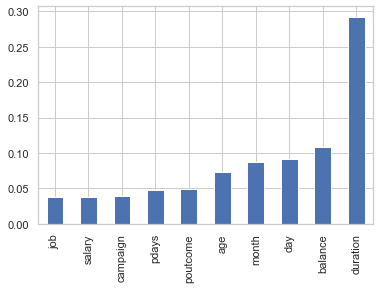

In [261]:
rfc_feature_selection(X,y)

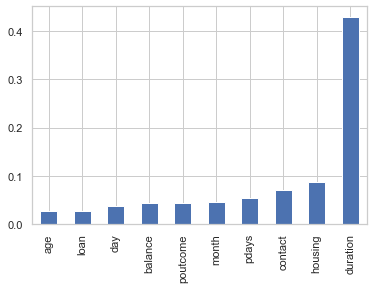

In [262]:
rfc_feature_selection(X_resmaple,y_resample)

### Observations :

We can test the features obtained from both the feature selection techniques by inserting these features to the model and depending on which set of features perform better, we can retain them for the model. 



Feature Duration is most important for model buliding

# Grid-Search & Hyperparameter Tuning 

Hyperparameters are function attributes that we have to specify for an algorithm. By now, you should be knowing that grid search is done to find out the best set of hyperparameters for your model.  

### Grid Search for Random Forest

In the below task, we write a function that performs hyperparameter tuning for a random forest classifier. We have used the hyperparameters `max_features`, `max_depth` and `criterion` for this task. Feel free to play around with this function by introducing a few more hyperparameters and chaniging their values

In [263]:
def grid_search_random_forrest(dataframe,target):

    x_train,x_val,y_train,y_val = train_test_split(X_resmaple,y_resample, test_size=0.3, random_state=0)
    rfc = RandomForestClassifier()
    param_grid = { 
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8,15,25,30,35,40],
    'criterion' :['gini', 'entropy']
    }
    grid_search_model = GridSearchCV(rfc, param_grid=param_grid)
    grid_search_model.fit(x_train, y_train)
    print('Best Parameters are:')
    return grid_search_model.best_params_




In [264]:
grid_search_random_forrest(X_resmaple,y_resample)

Best Parameters are:


{'criterion': 'gini', 'max_depth': 25, 'max_features': 'log2'}

In [274]:
rfc = RandomForestClassifier(n_estimators=11, max_features='log2', max_depth=25, criterion='gini')
rfrmodel=rfc.fit(X_train1, y_train1)
y_predrfr = rfc.predict(X_test1)   

In [275]:
newdf=pd.DataFrame({"actual":y_test1,"y_predicted":y_predrfr})
newdf

,actual,y_predicted
54895,1,1
2074,0,0
58972,1,1
30893,1,1
34550,1,1
...,...,...
22946,0,0
45414,1,1
6067,0,0
58248,1,1


In [276]:
confusion_matrix(y_predrfr,y_test1)

array([[7794,  265],
       [ 453, 9616]], dtype=int64)

On Validation data
ROC_AUC_SCORE is 0.9591258935129422


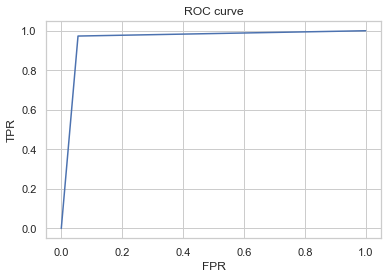

In [277]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test1, y_predrfr)
print('On Validation data')
print('ROC_AUC_SCORE is',roc_auc_score(y_test1, y_predrfr))

plt.clf()
plt.plot(false_positive_rate, true_positive_rate)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve')
plt.show() 

### Estimate the model performance using k fold cross validation

In [279]:
# Create an instance of Pipeline
#
pipeline = make_pipeline(StandardScaler(), RandomForestClassifier())
#
# Create an instance of StratifiedKFold which can be used to get indices of different training and test folds
#
strtfdKFold = StratifiedKFold(n_splits=10)
kfold = strtfdKFold.split(X_train1, y_train1)
scores = []
#
#
#
for k, (train, test) in enumerate(kfold):
    pipeline.fit(X,y)
    score = pipeline.score(X_train1, y_train1)
    scores.append(score)
    print('Fold: %2d, Training/Test Split Distribution: %s, Accuracy: %.3f' % (k+1, np.bincount(y_train1), score))
 
    print('\n\nCross-Validation accuracy: %.3f +/- %.3f' %(np.mean(scores), np.std(scores)))

Fold:  1, Training/Test Split Distribution: [19396 22900], Accuracy: 0.459


Cross-Validation accuracy: 0.459 +/- 0.000
Fold:  2, Training/Test Split Distribution: [19396 22900], Accuracy: 0.459


Cross-Validation accuracy: 0.459 +/- 0.000
Fold:  3, Training/Test Split Distribution: [19396 22900], Accuracy: 0.459


Cross-Validation accuracy: 0.459 +/- 0.000
Fold:  4, Training/Test Split Distribution: [19396 22900], Accuracy: 0.459


Cross-Validation accuracy: 0.459 +/- 0.000
Fold:  5, Training/Test Split Distribution: [19396 22900], Accuracy: 0.459


Cross-Validation accuracy: 0.459 +/- 0.000
Fold:  6, Training/Test Split Distribution: [19396 22900], Accuracy: 0.459


Cross-Validation accuracy: 0.459 +/- 0.000
Fold:  7, Training/Test Split Distribution: [19396 22900], Accuracy: 0.459


Cross-Validation accuracy: 0.459 +/- 0.000
Fold:  8, Training/Test Split Distribution: [19396 22900], Accuracy: 0.459


Cross-Validation accuracy: 0.459 +/- 0.000
Fold:  9, Training/Test Split Distributi

### What is the precision, recall, accuracy of your model?


In [286]:
print(classification_report(y_predrfr,y_test1))

              precision    recall  f1-score   support

           0       0.95      0.97      0.96      8059
           1       0.97      0.96      0.96     10069

    accuracy                           0.96     18128
   macro avg       0.96      0.96      0.96     18128
weighted avg       0.96      0.96      0.96     18128



In [287]:
importances = rfc.feature_importances_

In [288]:
sorted_indices = np.argsort(importances)[::-1]
sorted_indices

array([14,  5,  9,  7, 12,  8, 13, 16, 10, 17,  6, 15,  3,  0, 11,  2,  1,
        4], dtype=int64)

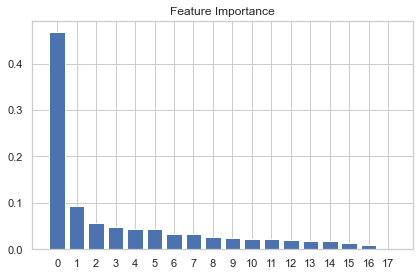

In [291]:
plt.title('Feature Importance')
plt.bar(range(X_train1.shape[1]), importances[sorted_indices], align='center')
plt.xticks(range(X_train1.shape[1]))
plt.tight_layout()
plt.show()

In [292]:
from sklearn.model_selection import KFold

### Compare the performance of the Random Forest and the logistic model –


In [293]:
# Import required libraries for performance metrics
from sklearn.metrics import make_scorer
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.model_selection import cross_validate

# Define dictionary with performance metrics
scoring = {'accuracy':make_scorer(accuracy_score), 
           'precision':make_scorer(precision_score),
           'recall':make_scorer(recall_score), 
           'f1_score':make_scorer(f1_score)}

# Instantiate the machine learning classifiers
log_model = LogisticRegression(max_iter=10000)

rfc_model = RandomForestClassifier()




In [343]:
# Define the models evaluation function
def models_evaluation(X, y, folds):
    log = cross_validate(log_model, X, y, cv=folds, scoring=scoring)
   
    rfc = cross_validate(rfc_model, X, y, cv=folds, scoring=scoring)

    models_scores_table = pd.DataFrame({'Logistic Regression':[log['test_accuracy'].mean(),
                                                               log['test_precision'].mean(),
                                                               log['test_recall'].mean(),
                                                               log['test_f1_score'].mean()],'Random Forest':[rfc['test_accuracy'].mean(),
                                                       rfc['test_precision'].mean(),
                                                       rfc['test_recall'].mean(),
                                                       rfc['test_f1_score'].mean()]},
    index=['Accuracy', 'Precision', 'Recall', 'F1 Score'])
      # Add 'Best Score' column
    models_scores_table['Best Score'] = models_scores_table.idxmax(axis=1)
     # Return models performance metrics scores data frame
    return(models_scores_table)
 

In [344]:
# Run models_evaluation function
models_evaluation(X_train1, y_train1, 5)

,Logistic Regression,Random Forest,Best Score
Accuracy,0.909400,0.961604,Random Forest
Precision,0.911309,0.955718,Random Forest
Recall,0.922445,0.974236,Random Forest
F1 Score,0.916838,0.964883,Random Forest


### Which metric did you choose and why?


Confusion Matrix,Auc_ROC curve is best metric for classification problem

### Which model has better performance on the test set?

Random Forest  Classifier has best performance 

### Compare the feature importance from the different models – do they agree? Are the top features similar in both models?

Yes,Top features importance are similiar in both model

# <center> Thanks 